In [86]:
import pandas as pd
import numpy as np



**Задание I.8.17**

Рассмотрим модель представления чисел в IEEE-арифметике следующего вида:
$S = \{\pm b_0, b_1b_2\cdot 2^{\pm a}\},$ причем $b_0 = 1$ всегда, кроме того случая, когда $a = b_1 = b_2 = 0$, тогда $b_0 \in \{0,1\}$.

In [ ]:

class Ieee(int):
  bits = 0
  

[0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 6, 8, 10]

In [88]:
data = {
  'S': S, 'sin(x)': np.sin(S)
}

df = pd.DataFrame(data)

df.to_csv('hw-1.csv', index=False)

**Задание 1.9**

$$f'''(x) \approx af(x + 2h) + bf(x+h) + cf(x) + df(x -h) + ef(x - 2h),$$

$$g(x) = \sin{x},$$

$$f(x) = e^{2x}, x_0 = 2$$

$\textcircled{a}$ 
\begin{gather*}
    f'''(x) \approx af(x + 2h) + bf(x+h) + cf(x) + df(x -h) + ef(x - 2h) = \\
    = af(x) + af'(x)2h + \frac{af''(x)4h^2}{2} + \frac{af'''(x)8h^3}{6} + \frac{af^{\text{IV}}(x)16h^4}{24} + \\
    + bf(x) + bf'(x)h + \frac{bf''(x)h^2}{2} +  \frac{bf'''(x)h^3}{6} + \frac{bf^{\text{IV}}(x)h^4}{24} + \\
    + cf(x) + \\ 
    + df(x) - df'(x)h + \frac{df''(x)h^2}{2} -  \frac{df'''(x)h^3}{6} + \frac{df^{\text{IV}}(x)h^4}{24} +\\
    + ef(x) - ef'(x)2h + \frac{ef''(x)4h^2}{2} - \frac{ef'''(x)8h^3}{6} + \frac{ef^{\text{IV}}(x)16h^4}{24}\Rightarrow
\end{gather*}

\begin{equation*}
\Rightarrow
    \begin{cases}
        a+b+c+d+e = 0 \\
        2a + b + 0 - d - 2e = 0 \\
        2a + \frac{1}{2}b + 0 + \frac{1}{2}d + 2e = 0 \\
        \frac{4}{3}a + \frac{1}{6}b + 0 - \frac{1}{6}d - \frac{4}{3}e = \frac{1}{h^3} \\
        \frac{2}{3}a + \frac{1}{24}b + 0 + \frac{1}{24}d + \frac{2}{3}e = 0 
    \end{cases}
    \Rightarrow
\end{equation*}

In [89]:

A = np.array([[1,1,1,1,1],
             [2,1,0,-1,-2],
             [2,1/2,0,1/2,2],
             [4/3,1/6,0,-1/6,-4/3],
             [2/3,1/24,0,1/24,2/3]])

b = np.array([0,0,0,1,0])

x = np.linalg.solve(A, b)

x


array([ 5.00000000e-01, -1.00000000e+00, -1.55431223e-15,  1.00000000e+00,
       -5.00000000e-01])

$$\Rightarrow ah^3 = 0.5, bh^3 = -1, ch^3 = 0, dh^3 = 1, eh^3= -0.5$$

Получили что $f'''(x) \approx \frac{0.5f(x + 2h) - f(x+h) + f(x -h) - 0.5f(x - 2h)}{h^3}$, $Err_{\text{method}} = |f'''(x) - \frac{0.5f(x + 2h) - f(x+h) + f(x - h) - 0.5f(x - 2h)}{h^3}| =|\frac{0.5\cdot32\cdot f^{(V)}(\theta_1)h^5 - f^{(V)}(\theta_2)h^5 - f^{(V)}(\theta_3)h^5 - 0.5\cdot32\cdot f^{(V)}(\theta_4)h^5}{120 h^3}| \leq M_5 \cdot \gamma \cdot h^2 \Rightarrow$ точность 2 порядка  

$\textcircled{b}$

Из а): $$f'''(x) \approx \frac{0.5f(x + 2h) - f(x+h) + f(x -h) - 0.5f(x - 2h)}{h^3} \Rightarrow$$ считая что погрешность вычисления функции $\Delta f$, заключаем, что погрешность самих вычислений: $Err_{\text{calc}} = \frac{3 \Delta f}{h^3} = O(h^{-3})$

Объединим обе ошибки и выведем оптимальное $h^*$: $Err = Err_{\text{method}} + Err_{\text{calc}} = \frac{3 \Delta f}{h^3} + \gamma M_5 \cdot h^2 \rightarrow Err' = - \frac{9 \Delta f}{h^{*4}} + 2\gamma M_5 \cdot h^* = 0 \rightarrow h^* = \left(\frac{9 \Delta f}{2\gamma M_5}\right)^{1/5}$


**Пункты** $\textcircled{c},\textcircled{d}$

$\Delta f \approx 10^{-16}$ 

$1000 \leq M_5 \leq 2000$

$\gamma = 0.28$

Получается что $h^* = 4\cdot 10^{-4} \approx 2^{-11}$ 

In [90]:
def approx_der (f, x, h):
  return (0.5*f(2*x + 4*h) - f(2*x + 2*h) + f(2*x - 2*h) - 0.5*f(2*x - 4*h)) / (h*h*h)


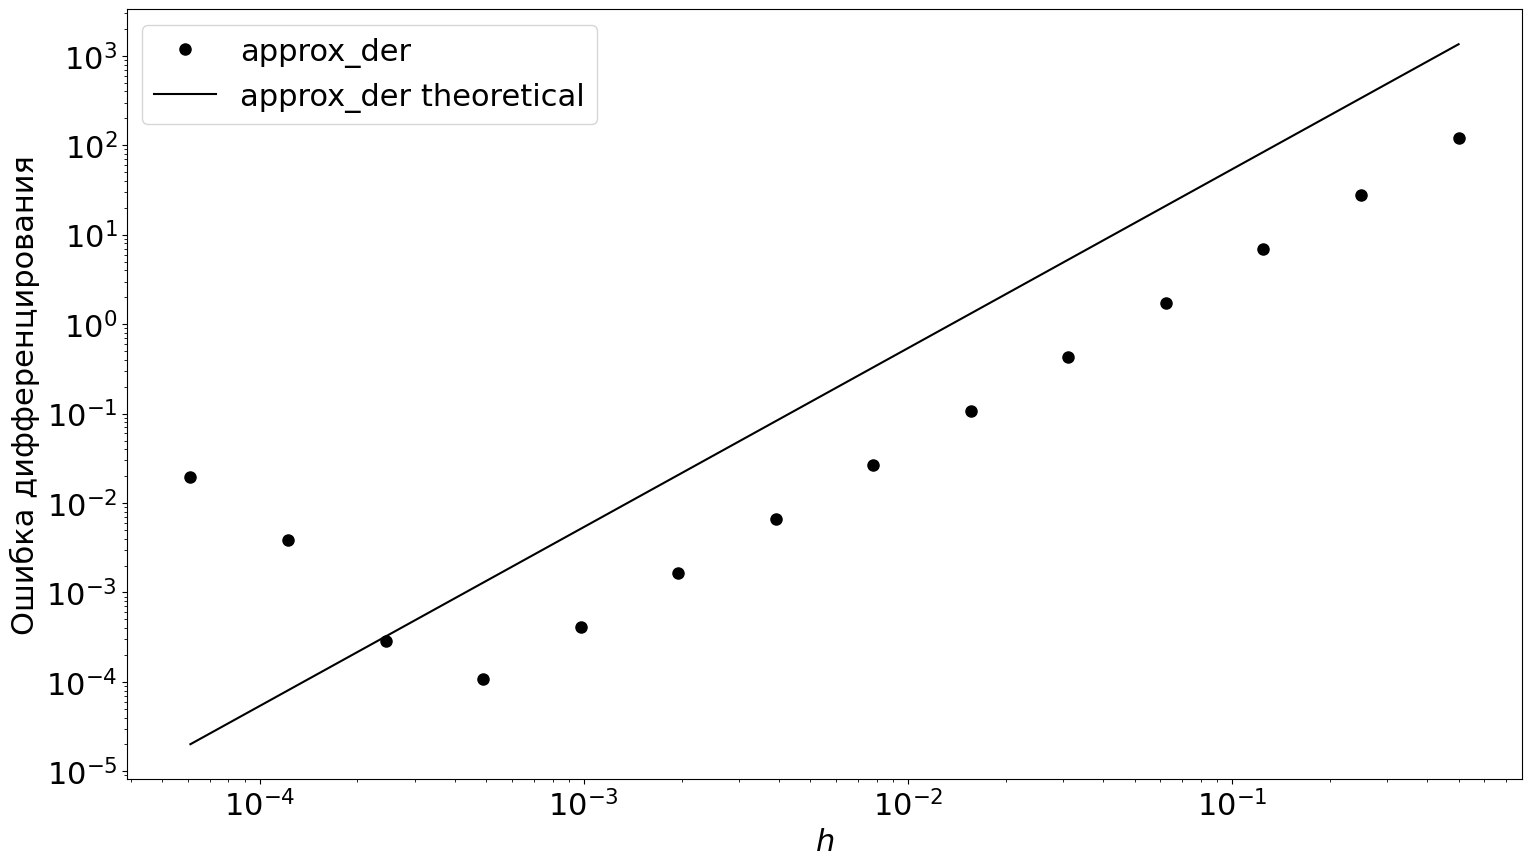

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 22})

# массив, содержащий различные шаги дифференцирования 2^(-1), 2^(-2), ...
h_array = 2.0**(-np.arange(1, 15, 1))

err_approx_der = []
err_approx_der_theor = []

M5 = 2000
gamma = 2.7

# Вычисляем значение ошибки и теоретическую оценку ошибки при различных шагах дифференцирования
for h in h_array:
    err_approx_der.append(abs(approx_der(np.exp, 2, h) - 8*np.exp(2*2)))
    err_approx_der_theor.append(gamma * M5 * h * h)

plt.figure(figsize=(18, 10))

# Рисуем в логорифмической шкале 
plt.loglog(h_array, err_approx_der, 'k.', ms=16, label='approx_der')
plt.loglog(h_array,err_approx_der_theor, 'k-', label='approx_der theoretical')

plt.xlabel('$h$')
plt.ylabel('Ошибка дифференцирования')
plt.legend()

plt.show()


Выше сделали с двойной точнростью, теперь сделаем с одинарной:

In [92]:
def approx_der (f, x, h):
  return np.float32(0.5*np.float32(f(2*x + 4*h)) - np.float32(f(2*x + 2*h)) + np.float32(f(2*x - 2*h)) - 0.5*np.float32(f(2*x - 4*h)) / np.float32(h*h*h))


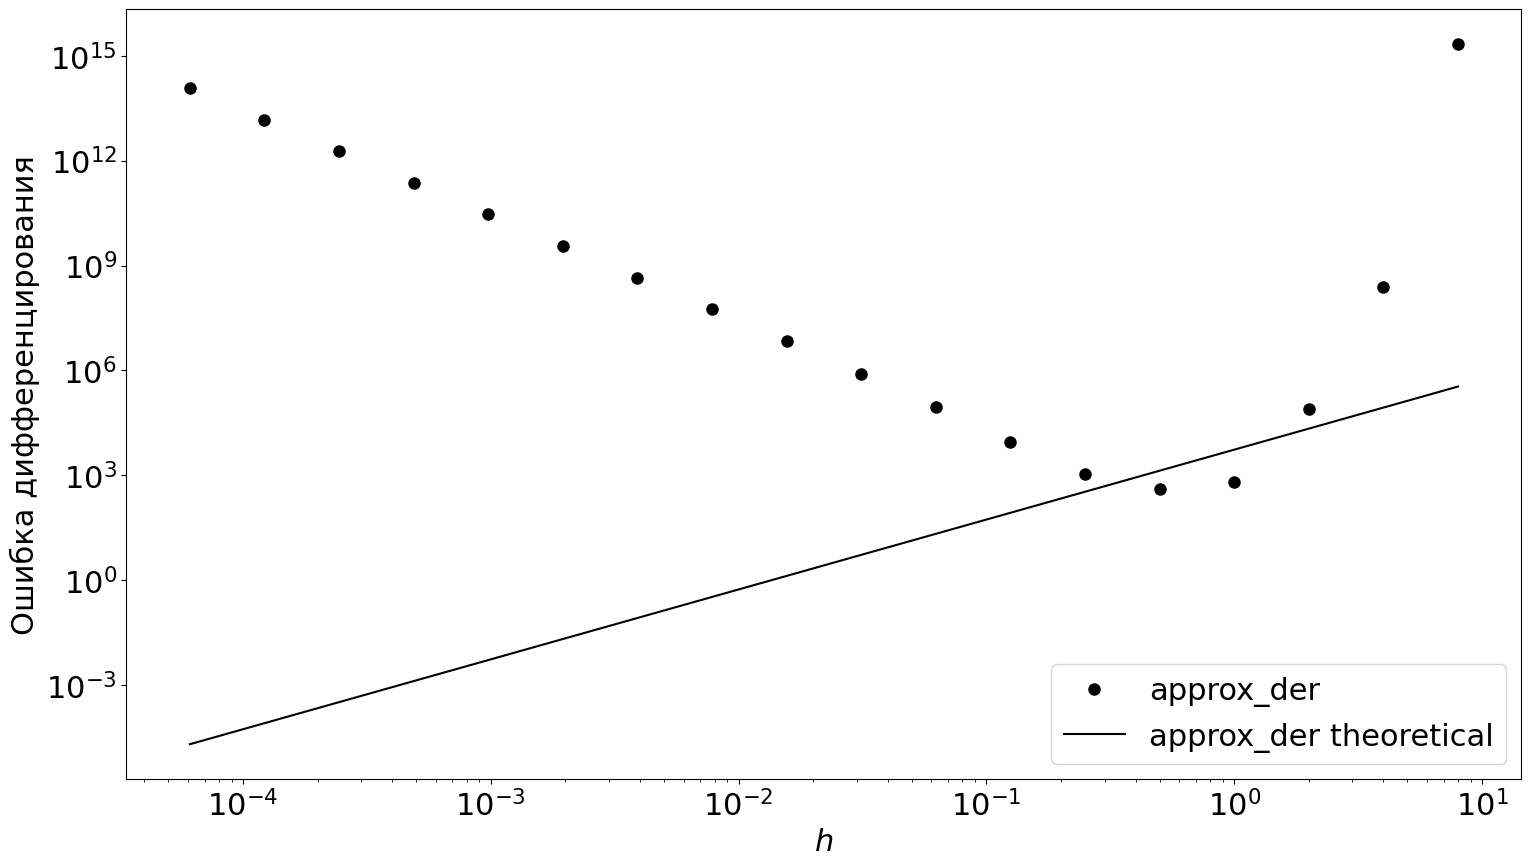

In [93]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 22})

# массив, содержащий различные шаги дифференцирования 2^(-1), 2^(-2), ...
h_array = np.float32(2.0**(-np.arange(-3, 15, 1)))

err_approx_der = []
err_approx_der_theor = []

M5 = np.float32(2000)
gamma = np.float32(2.7)

# Вычисляем значение ошибки и теоретическую оценку ошибки при различных шагах дифференцирования
for h in h_array:
    err_approx_der.append(abs(np.float32(approx_der(np.exp, 2, h) - np.float32(8*np.exp(2*2)))))
    err_approx_der_theor.append(np.float32(gamma * M5 * h * h))

plt.figure(figsize=(18, 10))

# Рисуем в логорифмической шкале 
plt.loglog(h_array, err_approx_der, 'k.', ms=16, label='approx_der')
plt.loglog(h_array,err_approx_der_theor, 'k-', label='approx_der theoretical')

plt.xlabel('$h$')
plt.ylabel('Ошибка дифференцирования')
plt.legend()

plt.show()


Видим проблемы... алгоритм не может адекватно работать при одинарной точности, так, как нам приходится считать $h^3 \approx 2^{-30}$

In [100]:
print(np.float32(np.exp2(-30)))

print(np.float64(np.exp2(-30)))

9.313226e-10
9.313225746154785e-10


получаем различие в $0.5 \cdot 10^{-16}$ знаков и видимо оно и делает нам всю погоду

**Задача I.9.1**

Написать программу для вычисления $exp(x)$, пользуясь рядом Маклорена и конечностью разрядов машинной арифметики: ввести величину
SUM = 1., в цикле по 
I вычислять TERM = TERM * X / I, 
и если SUM + TERM равен SUM, то закончить вычисления и напечатать результат, а если не равен, то SUM = SUM + TERM и выполнять цикл далее. Вычислить и сравнить SUM и экспоненту от $x$ для следующих аргументов: 
$$x \in \{1,5,10,15,20,25,-1,-5,-10, -15, -20,-25\}$$

при вычислениях с одинарной точностью. Объяснить результат. Предложить усовершенствованную процедуру для вычисления экспоненты отрицательного аргумента.

**Решение**



In [95]:
# одинарная точность

X = [1,5,10,15,20,25,-1,-5,-10,-20,-25]

for x in X:
  SUM  = np.float32(0)
  TERM = np.float32(1)

  i = 0
  while (SUM + TERM != SUM):
    SUM += TERM
    i += 1
    TERM *= x/i 
  
  print("x -", x, "; iterations number -", i, "; SUM -", SUM, "real result - ", np.exp(x))
  print()




x - 1 ; iterations number - 11 ; SUM - 2.718282 real result -  2.718281828459045

x - 5 ; iterations number - 22 ; SUM - 148.41316 real result -  148.4131591025766

x - 10 ; iterations number - 32 ; SUM - 22026.465 real result -  22026.465794806718

x - 15 ; iterations number - 41 ; SUM - 3.269017e+06 real result -  3269017.3724721107

x - 20 ; iterations number - 49 ; SUM - 4.8516522e+08 real result -  485165195.4097903

x - 25 ; iterations number - 56 ; SUM - 7.200487e+10 real result -  72004899337.38588

x - -1 ; iterations number - 12 ; SUM - 0.3678794 real result -  0.36787944117144233

x - -5 ; iterations number - 28 ; SUM - 0.006737142 real result -  0.006737946999085467

x - -10 ; iterations number - 46 ; SUM - -5.2342282e-05 real result -  4.5399929762484854e-05

x - -20 ; iterations number - 67 ; SUM - -1.7970337 real result -  2.061153622438558e-09

x - -25 ; iterations number - 75 ; SUM - -737.664 real result -  1.3887943864964021e-11



In [96]:
# двойная точность

X = [1,5,10,15,20,25,-1,-5,-10,-20,-25]

for x in X:
  SUM  = np.float64(0)
  TERM = np.float64(1)

  i = 0
  while (SUM + TERM != SUM):
    SUM += TERM
    i += 1
    TERM *= x/i 
  
  print("x -", x, "; iterations number -", i, "; SUM -", SUM, "real result - ", np.exp(x))
  print()




x - 1 ; iterations number - 18 ; SUM - 2.7182818284590455 real result -  2.718281828459045

x - 5 ; iterations number - 33 ; SUM - 148.4131591025766 real result -  148.4131591025766

x - 10 ; iterations number - 46 ; SUM - 22026.465794806714 real result -  22026.465794806718

x - 15 ; iterations number - 58 ; SUM - 3269017.3724721107 real result -  3269017.3724721107

x - 20 ; iterations number - 68 ; SUM - 485165195.40979046 real result -  485165195.4097903

x - 25 ; iterations number - 77 ; SUM - 72004899337.38591 real result -  72004899337.38588

x - -1 ; iterations number - 19 ; SUM - 0.36787944117144245 real result -  0.36787944117144233

x - -5 ; iterations number - 39 ; SUM - 0.006737946999084638 real result -  0.006737946999085467

x - -10 ; iterations number - 59 ; SUM - 4.539992967040021e-05 real result -  4.5399929762484854e-05

x - -20 ; iterations number - 95 ; SUM - 6.147561828914626e-09 real result -  2.061153622438558e-09

x - -25 ; iterations number - 107 ; SUM - 8.181

Видно что все наши проблемы из-за накапливаемой ошибки вычислений, которая в какой-то момент сравнима с $\epsilon_{\text{mach}}$, поэтому омгу предложить вариант что мы не будем напрямую считать $e^x$ от отрицательных чисел, а сначала считать $e^{-x}$, а потом пересчитывать по формуле: $1/e^{-1} = e^x$

In [97]:
# одинарная точность

X = [1,5,10,15,20,25,-1,-5,-10,-20,-25]

for x in X:
  SUM  = np.float32(0)
  TERM = np.float32(1)
  marker = 0
  if x < 0:
    x *= -1
    marker = 1
  i = 0
  while (SUM + TERM != SUM):
    SUM += TERM
    i += 1
    TERM *= x/i 
  if marker == 1:
    SUM = 1 / SUM
    x *= -1  
  print("x -", x, "; iterations number -", i, "; SUM -", SUM, "real result - ", np.exp(x))
  print()




x - 1 ; iterations number - 11 ; SUM - 2.718282 real result -  2.718281828459045

x - 5 ; iterations number - 22 ; SUM - 148.41316 real result -  148.4131591025766

x - 10 ; iterations number - 32 ; SUM - 22026.465 real result -  22026.465794806718

x - 15 ; iterations number - 41 ; SUM - 3.269017e+06 real result -  3269017.3724721107

x - 20 ; iterations number - 49 ; SUM - 4.8516522e+08 real result -  485165195.4097903

x - 25 ; iterations number - 56 ; SUM - 7.200487e+10 real result -  72004899337.38588

x - -1 ; iterations number - 11 ; SUM - 0.36787942 real result -  0.36787944117144233

x - -5 ; iterations number - 22 ; SUM - 0.006737947 real result -  0.006737946999085467

x - -10 ; iterations number - 32 ; SUM - 4.539993e-05 real result -  4.5399929762484854e-05

x - -20 ; iterations number - 49 ; SUM - 2.0611535e-09 real result -  2.061153622438558e-09

x - -25 ; iterations number - 56 ; SUM - 1.388795e-11 real result -  1.3887943864964021e-11



Получаем результат, явно лучший чем раньше!